# Titanic

#### ¿Cómo hacer un proyecto de ciencia de datos de principio a fin?

En este proyecto vamos a predecir la supervivencia de varias personas en el Titanic. Este es un buen proyecto introductorio de **aprendizaje supervisado** que se enfoca en *feature engineering*, lo cual es muy importante para el aprendizaje de máquina. Además, las features de este dataset son muy diferentes, por lo que se puede practicar mucho.

## ¿Cómo comenzar?

Para hacer un proyecto de ciencia de datos se pasa por varias etapas:
 1. Definir el problema, ¿qué es lo que se quiere conseguir?
 2. Obtener los datos
 3. Limpiar y preparar los datos
 4. Analizar y explorar los datos para identificar patrones
 5. Determinar las características que se van a utilizar en el modelo
 6. Hacer el modelo de ML, entrenarlo y hacer las predicciones
 7. Visualizaciones y presentación para tener una solución final
 8. Entrega de la solución
 
Estas etapas se pueden modificar, combinar o eliminar dependiendo del proyecto. Por ejemplo, es posible hacer el análisis de los datos con visualizaciones.

### Definición del problema

En este caso Kaggle, la página donde obtuvimos los datos, definió el problema: predecir la supervivencia de personas en el Titanic. En esta etapa, también es útil informarse sobre el problema para poder formular una hipótesis y trabajar sobre eso.

El objetivo de este problema es **clasificar** a los pasajeros del Titanic en dos clases diferentes: personas que sobrevivieron y personas que no. La **clasificación** es una de las diferentes cosas que se pueden hacer en machine learning:
* Selección de características
* Clasificación
* Regresión
* Clustering
* Optimización
* Ranking

### Importar las librerias necesarias

In [1]:
# Análisis de datos
import pandas as pd
import numpy as np

# Visualización
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

### Obtener los datos

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Limpieza de los datos

En este dataset se tienen diferentes tipos de datos diferentes:
 * Categóricas: Survived, Sex y Embarked
 * Ordinales: Pclass
 * Numéricas:
     * Continuas: Age y Fare
     * Discretas: SibSp y Parch
 * Texto: Name, Ticket y Cabin

También, hay algunas columnas con valores nulos, para estos podemos decidir tirar los renglones, o rellenar los datos. En este caso, el dataset no es muy grande, por lo que decidiremos rellenar los datos.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Además de ver los tipos de datos, es importante también ver de qué estan compuestos y su distribución.

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Smith, Miss. Marion Elsie",male,1601,G6,S
freq,1,577,7,4,644


### Análisis mediante visualización

Una buena forma de decidir si incluir una columna en el modelo es visuaizar la columna para ver si tiene alguna relación con lo que se quiere predecir.

#### Edad

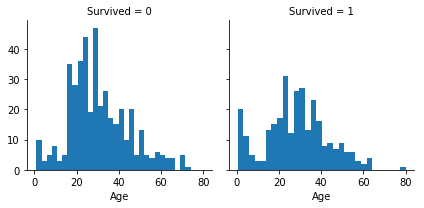

In [13]:
age = sns.FacetGrid(train, col='Survived')
age.map(plt.hist, 'Age', bins=30)

Se puede ver como los  niños pequeños y las personas mayores de 80 años tienen probabilidad mucho mayor de sobrevivir de las demás personas, además se puede ver en la distribución que la mayoría de las personas tiene entre 15 y 35 años. Por la relación que se puede ver entre los niños pequeños y las personas mayores y su supervivencia, podemos decidir incluir a esta columna.

#### Pclass

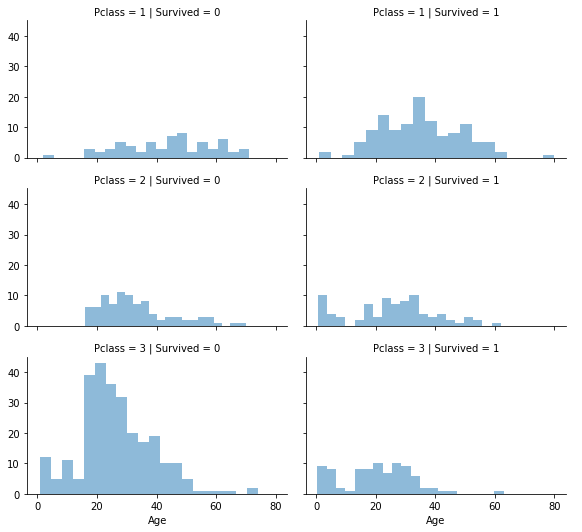

In [14]:
pclass = sns.FacetGrid(train, col='Survived', row='Pclass', height=2.5, aspect=1.6)
pclass.map(plt.hist, 'Age', alpha=.5, bins=20)
pclass.add_legend();

En este caso, como se podía esperar, se puede ver una clara relación entre la clase del pasajero y su supervivencia. Una gran parte de los pasajeros de clase 1 sobrevive, mientras que muy pocos de los pasajeros de clase 3. Por eso, podemos decidir que sí utilizaremos esta columna en el modelo.

#### Embarked

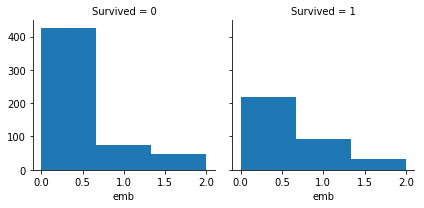

In [15]:
train['emb']=train['Embarked'].apply(lambda d: 0 if d=='S' else (1 if d== 'C' else 2))
emb = sns.FacetGrid(train, col='Survived')
emb.map(plt.hist, 'emb', bins=3)
train.drop(columns='emb', inplace=True)

Aquí se puede ver que de todas las personas que embarcaron en S no sobrevivieron tantas, mientras que la posibilidad de supervivencia en C son mayores, por esto, también es importante incluir esta característica.

### Análisis utilizando pivotes

Además de utilzar visualizaciones, se pueden también utilizar pivotes para poder ver si hay alguna relación en las características.

####  Sexo

In [16]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Aquí podemos ver que el 74% de las mujeres sí sobrevivieron al Titanic, mientras que solamente el 19% de los hombres sobrevivieron. Con esto, podemos decidir incluir esta característica.

####  Familiares

En el dataset hay dos características que incluyen familiares: Parch (cantidad de padres e hijos) y SibSp (Esposos y hermanos)

In [17]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [18]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Normalmente sobreviven las personas que iban con menos acompañantes. Tener pocos acompañantes, pero no 0, incrementa la posibilidad de sobrevivir.

### Data Wrangling

Lo primero que se tiene que hacer es tirar las columnas que no se van a utilizar en el entrenamiento.

**Nota: Es importante que todo lo que se haga con el train dataset se haga también con el test.**

In [19]:
train.drop(columns=['Ticket','Cabin'], inplace=True)
test.drop(columns=['Ticket','Cabin'], inplace=True)

#### Crear una nueva feature utiizando features existentes

En el caso del nombre, no se puede utilizar en la forma en la que está actualmente en un algoritmo de ML. Por esto, únicamente tomaremos el título de las personas.

In [20]:
train['Title']=train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title']=test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [23]:
print(train['Title'].value_counts())
print(test['Title'].value_counts())

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64
Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: Title, dtype: int64


Algunos de estos títulos ocurren muy pocas veces, por lo que podemos agruparlos como un titulo "Raro".

In [22]:
train['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'}, inplace=True)
raros = list(train['Title'].value_counts().keys()[4:])
train['Title'].replace(raros,'Rare', inplace=True)

test['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'}, inplace=True)
raros = list(test['Title'].value_counts().keys()[4:])
test['Title'].replace(raros,'Rare', inplace=True)

In [24]:
train[['Title', 'Survived']].groupby(['Title']).mean().sort_values('Survived', ascending=False)

,Survived
Title,
Mrs,0.793651
Miss,0.702703
Master,0.575000
Rare,0.347826
Mr,0.156673


Aquí podemos ver que el título sí esta correlacionado con la supervivencia, entonces si lo utilizaremos para el modelo. Y podemos ya tirar la columna con el nombre.

Para poderlo utilizar, lo podemos convertir a valores numéricos. La mejor forma de hacer esto es con One Hot Encoding, pero también se puede hacer con números.

In [25]:
train.drop(columns='Name', inplace=True)
test.drop(columns='Name', inplace=True)

Para llenar los valores nulos en la columna de la edad, podemos poner el valor de la mediana (es mejor utilizar la mediana que la media)

In [26]:
train.fillna(train.median(), inplace=True)
test.fillna(test.median(), inplace=True)

### One Hot Encoding

One Hot Encoding es una forma de tomar las featres categóricas y convertirlas en varias columnas booleanas, esto normalmente se hace cuando no hay una herarquía en la categoría de la que se está hablando. Un ejemplo de una variable en la que se puede hacer One Hot Encoding es Embarked, una en la que no se puede hacer es en Pclass.

In [27]:
cols=['Sex','Title','Embarked']

In [28]:
train=pd.get_dummies(train,prefix_sep = '__',  columns = cols)
test=pd.get_dummies(test,prefix_sep = '__',  columns = cols)

In [29]:
train.set_index('PassengerId', inplace=True)
test.set_index('PassengerId', inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex__female,Sex__male,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Rare,Embarked__C,Embarked__Q,Embarked__S
PassengerId,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1,0,0,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,0,0,0,1,0,1,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,1,0,0,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,0,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1,0,0,0,0,1


In [30]:
test.isna().sum()

Pclass           0
Age              0
SibSp            0
Parch            0
Fare             0
Sex__female      0
Sex__male        0
Title__Master    0
Title__Miss      0
Title__Mr        0
Title__Mrs       0
Title__Rare      0
Embarked__C      0
Embarked__Q      0
Embarked__S      0
dtype: int64

### Modelos y predicciones

En este problema, probaremos varios diferentes modelos de Machine Learning para poderlos comparar y llegar al mejor resultado.

In [36]:
X_train=train.drop(columns='Survived')
y_train=train['Survived']

In [31]:
modelos=[('logreg',LogisticRegression()),
         ('svc',SVC()),
         ('linear svc',LinearSVC()),
         ('forest',RandomForestClassifier(n_estimators=100)),
         ('neigh',KNeighborsClassifier(n_neighbors=3)),
         ('gauss',GaussianNB()),
         ('perceptron',Perceptron()),
         ('sgd',SGDClassifier()),
         ('tree',DecisionTreeClassifier())]

In [32]:
model_scores = {}

In [39]:
for modelo in modelos:
    score = cross_val_score(modelo[1], X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1).mean()
    model_scores[modelo[0]]=score

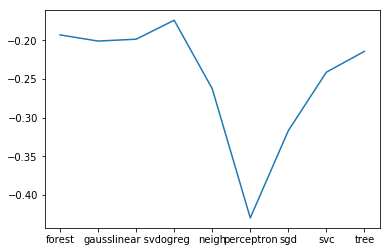

In [40]:
lst = sorted(model_scores.items())
x, y = zip(*lst)
plt.plot(x,y)

En este caso, la regresión logística, GaussianNB y Random Forest son los que tienen una mejor calificación. Para continuar utilizaremos regresión logística.

In [42]:
pd.DataFrame({'Model':list(model_scores.keys()),'Score':list(model_scores.values())}).sort_values('Score', ascending=False)

,Model,Score
0,logreg,-0.173948
3,forest,-0.192925
2,linear svc,-0.198480
5,gauss,-0.200878
8,tree,-0.214235
1,svc,-0.241128
4,neigh,-0.262490
7,sgd,-0.316807
6,perceptron,-0.429696


In [43]:
model=LogisticRegression()
model.fit(X_train, y_train)

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
pd.DataFrame({'id':test.index,'Survived':model.predict(test)})

,id,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
